In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

Mounted at /content/drive


## shp 파일 시각화

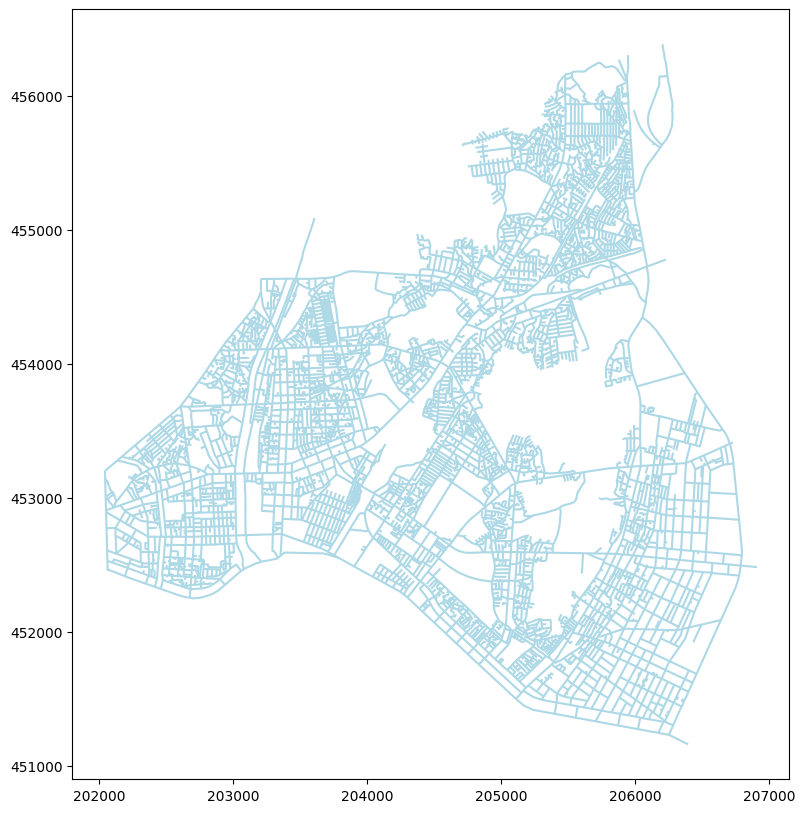

In [2]:
# Shapefile 읽기
dir_path ="/content/drive/MyDrive/2024-02-machine-learning/data/geolocation_data"
file_name = "TL_SPRD_MANAGE.shp"
dongdaemun_map = gpd.read_file(f"{dir_path}/{file_name}")

# Shapefile에서 동대문구 필터링
filtered_map = dongdaemun_map[dongdaemun_map['SIG_CD'] == '11230']

# 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 10))
filtered_map.plot(ax=ax, edgecolor='black', color='lightblue')
plt.show()

## 건축물 대장 데이터 전처리

In [3]:
# 건축물 데이터 읽기
dir_path = "/content/drive/MyDrive/bigdata/dataset"
file_name = "표제부 조회.xlsx"
architecture = pd.read_excel(f"{dir_path}/{file_name}")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
architecture.columns = architecture.iloc[3]
architecture = architecture[4:].reset_index(drop=True)

architecture.head()

3,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,관리건축물대장PK,대장구분코드,대장구분코드명,...,에너지효율등급,에너지절감율,EPI점수,친환경건축물등급,친환경건축물인증점수,지능형건축물등급,지능형건축물인증점수,생성일자,내진설계적용여부,내진능력
0,1,서울특별시 동대문구 신설동 1-2번지,11230,10100,0,0001,0002,11230-20614,1,일반,...,NaN,0,0,NaN,0,NaN,0,20230904,1,NaN
1,2,서울특별시 동대문구 신설동 100-22번지,11230,10100,0,0100,0022,11230-26199,2,집합,...,NaN,0,0,NaN,0,NaN,0,20240603,1,NaN
2,3,서울특별시 동대문구 신설동 100-23번지,11230,10100,0,0100,0023,11230-30049,1,일반,...,NaN,0,0,NaN,0,NaN,0,20171205,NaN,NaN
3,4,서울특별시 동대문구 신설동 100-25번지,11230,10100,0,0100,0025,11230-8576,1,일반,...,NaN,0,0,NaN,0,NaN,0,20231023,0,NaN
4,5,서울특별시 동대문구 신설동 100-26번지,11230,10100,0,0100,0026,11230-100241352,2,집합,...,NaN,0,82,NaN,0,NaN,0,20180921,1,VII-0.197g


In [5]:
architecture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27285 entries, 0 to 27284
Data columns (total 78 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   순번           27285 non-null  object
 1   대지위치         27285 non-null  object
 2   시군구코드        27285 non-null  object
 3   법정동코드        27285 non-null  object
 4   대지구분코드       27285 non-null  object
 5   번            27285 non-null  object
 6   지            27285 non-null  object
 7   관리건축물대장PK    27285 non-null  object
 8   대장구분코드       27285 non-null  object
 9   대장구분코드명      27285 non-null  object
 10  대장종류코드       27285 non-null  object
 11  대장종류코드명      27285 non-null  object
 12  도로명대지위치      27285 non-null  object
 13  건물명          4259 non-null   object
 14  특수지명         23 non-null     object
 15  블록           0 non-null      object
 16  로트           0 non-null      object
 17  외필지수         27285 non-null  object
 18  새주소도로코드      25088 non-null  object
 19  새주소법정동코드     25088 non-nu

In [6]:
# 필요한 칼럼만 필터링
architecture = architecture[['대지위치', '도로명대지위치', '주용도코드', '주용도코드명', '사용승인일']]

# 사용승인일 칼럼을 datetime 형식으로 변환
architecture['사용승인일'] = pd.to_datetime(architecture['사용승인일'], format='%Y%m%d', errors='coerce')

architecture.head()

<ipython-input-6-d993ecf955f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  architecture['사용승인일'] = pd.to_datetime(architecture['사용승인일'], format='%Y%m%d', errors='coerce')


3,대지위치,도로명대지위치,주용도코드,주용도코드명,사용승인일
0,서울특별시 동대문구 신설동 1-2번지,서울특별시 동대문구 한빛로 42,04000,제2종근린생활시설,1993-02-25
1,서울특별시 동대문구 신설동 100-22번지,서울특별시 동대문구 청계천로 433,14000,업무시설,1992-01-21
2,서울특별시 동대문구 신설동 100-23번지,서울특별시 동대문구 청계천로 431,14000,업무시설,1995-09-05
3,서울특별시 동대문구 신설동 100-25번지,서울특별시 동대문구 청계천로 435,03000,제1종근린생활시설,1995-11-01
4,서울특별시 동대문구 신설동 100-26번지,서울특별시 동대문구 청계천로 443,14000,업무시설,2018-09-17


In [7]:
# 현재 날짜 기준
current_year = pd.Timestamp.now().year #2024

# 노후 기준 함수 정의
def is_obsolete(row):
    if row['주용도코드명'] == '공동주택':  # 공동주택의 경우 30년 기준
        return current_year - row['사용승인일'].year >= 30

# 노후 건축물 여부 판별
architecture['노후건축물'] = architecture.apply(is_obsolete, axis=1)

# 노후 건축물 데이터만 필터링
old_architecture = architecture[architecture['노후건축물'] == 1]

# 결과 확인
print(old_architecture.head())

# 데이터 크기 확인
print(f"노후 건축물 데이터 개수: {old_architecture.shape[0]}")


3                       대지위치                 도로명대지위치  주용도코드 주용도코드명      사용승인일  \
52   서울특별시 동대문구 신설동 104-20번지    서울특별시 동대문구 천호대로4길 17  02000   공동주택 1984-06-04   
93   서울특별시 동대문구 신설동 114-23번지   서울특별시 동대문구 청계천로1가길 14  02000   공동주택 1978-11-04   
354  서울특별시 동대문구 신설동 91-232번지     서울특별시 동대문구 왕산로5길 16  02000   공동주택 1980-12-02   
365  서울특별시 동대문구 신설동 91-244번지    서울특별시 동대문구 왕산로5길 9-6  02000   공동주택 1980-08-20   
366  서울특별시 동대문구 신설동 91-245번지    서울특별시 동대문구 왕산로5길 7-4  02000   공동주택 1982-12-18   

3   노후건축물  
52   True  
93   True  
354  True  
365  True  
366  True  
노후 건축물 데이터 개수: 580


In [8]:
output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/노후주택.csv"
old_architecture.to_csv(output_path, index=False, encoding='utf-8-sig')

In [19]:
# 위도, 경도가 포함된 노후건축물 데이터 조회
dir_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료"
file_name = "노후주택.xlsx"
old_architecture_df = pd.read_excel(f"{dir_path}/{file_name}")

In [20]:
old_architecture_df.head()

,대지위치,Latitude,Longitude,도로명대지위치,주용도코드,주용도코드명,사용승인일,노후건축물
0,서울특별시 동대문구 신설동 104-20번지,37.573545,127.025365,서울특별시 동대문구 천호대로4길 17,2000,공동주택,1984-06-04,True
1,서울특별시 동대문구 신설동 114-23번지,37.571849,127.025896,서울특별시 동대문구 청계천로1가길 14,2000,공동주택,1978-11-04,True
2,서울특별시 동대문구 신설동 91-232번지,37.577598,127.026841,서울특별시 동대문구 왕산로5길 16,2000,공동주택,1980-12-02,True
3,서울특별시 동대문구 신설동 91-244번지,37.577236,127.026500,서울특별시 동대문구 왕산로5길 9-6,2000,공동주택,1980-08-20,True
4,서울특별시 동대문구 신설동 91-245번지,37.577121,127.026529,서울특별시 동대문구 왕산로5길 7-4,2000,공동주택,1982-12-18,True


In [21]:
old_architecture_df = old_architecture_df.drop_duplicates()
old_architecture_df = old_architecture_df[['대지위치', 'Latitude', 'Longitude', '주용도코드명', '사용승인일']].rename(columns={'Longitude': 'x', 'Latitude': 'y'})
old_architecture_df.head()

,대지위치,y,x,주용도코드명,사용승인일
0,서울특별시 동대문구 신설동 104-20번지,37.573545,127.025365,공동주택,1984-06-04
1,서울특별시 동대문구 신설동 114-23번지,37.571849,127.025896,공동주택,1978-11-04
2,서울특별시 동대문구 신설동 91-232번지,37.577598,127.026841,공동주택,1980-12-02
3,서울특별시 동대문구 신설동 91-244번지,37.577236,127.026500,공동주택,1980-08-20
4,서울특별시 동대문구 신설동 91-245번지,37.577121,127.026529,공동주택,1982-12-18


In [23]:
output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/노후주택 최종데이터.csv"
old_architecture_df.to_csv(output_path, index=False, encoding='utf-8-sig')

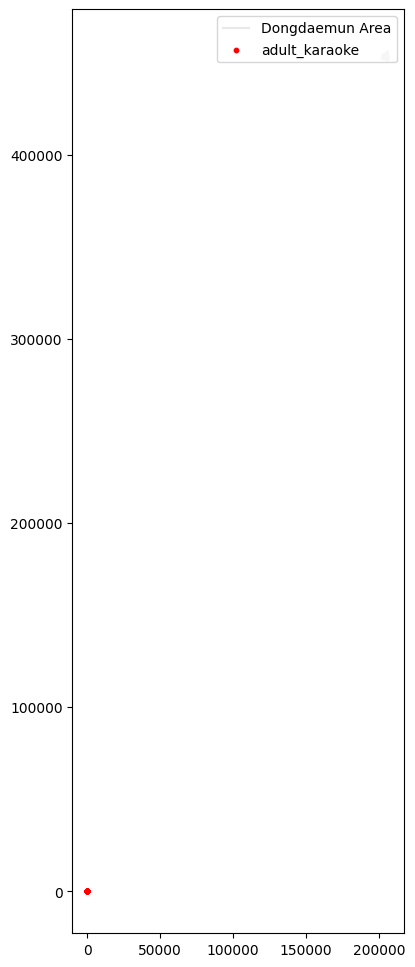

In [24]:
# 단란주점 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(old_architecture_df['x'], old_architecture_df['y'])]
old_architecture_df_geo = gpd.GeoDataFrame(old_architecture_df, geometry=geometry, crs="EPSG:4326")

# 유흥주점 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
old_architecture_df_geo = old_architecture_df_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 유흥주점 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
old_architecture_df_geo.plot(ax=ax, color='red', markersize=10, label='adult_karaoke')
plt.legend()
plt.show()